# SBTi data visualization

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from os import path
from script import preprocess_isin


### Visualization
We want to represent the following features :
* Geographical origin of the GhG emission mitigation pledges
* Types of companies
* The sectors of the companies
* The dates of the pledges

**Here, we only focus on the companies that are listed on the stock exchange, those are the companies that have an ISIN number.**

In [3]:
# The folders used to store data (raw data & results), can be changed if needed
data_folder = "data/" 
result_folder = "results/"
# The instructions to save the plots have been put as commentary by default

In [4]:
# Data loading and cleaning using the an auxilliary function from the python script :
file_name = path.join(data_folder, "companies-taking-action.xlsx")
df = preprocess_isin( file_name, decimal = ',')

# Two sub-dataframe containing the strongest emmission mitigation plans:
target_set = df[ df['Near term - Target Status'] == 'Targets Set' ] 
net_zero = df[ df['Net-Zero Committed'] == 'Yes']


### Geographical origin

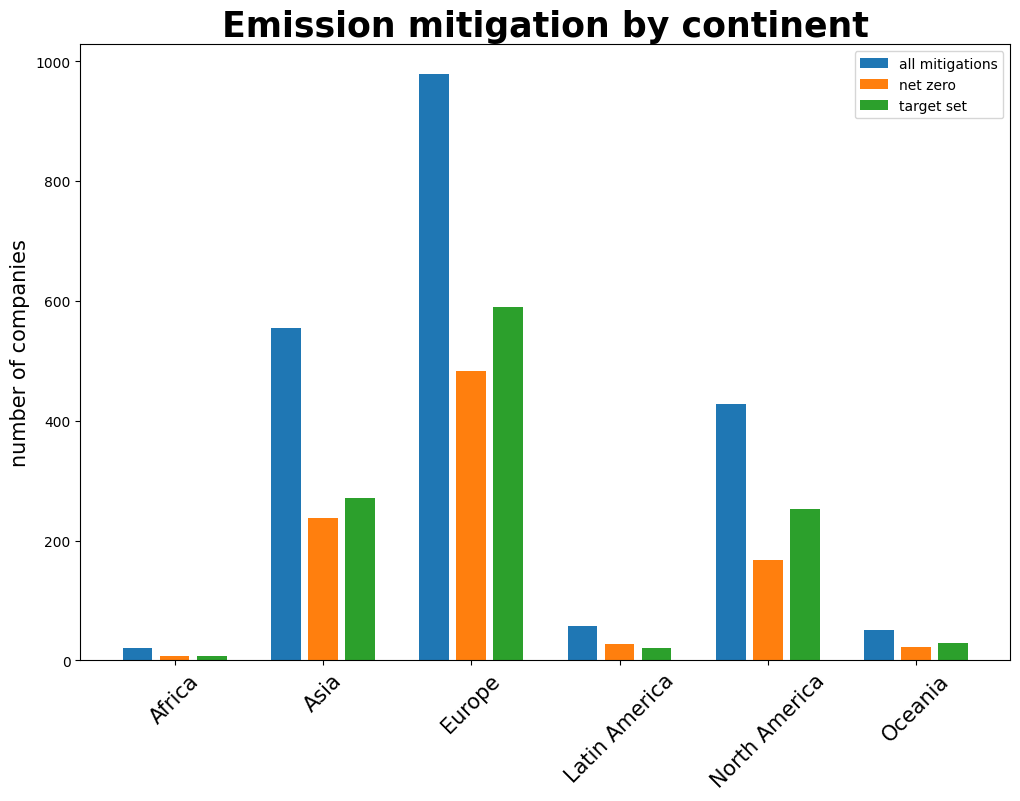

In [5]:
# data
region = df.groupby(by = 'Region' )
region_net_zero = net_zero.groupby(by = 'Region' )
region_target_set = target_set.groupby(by = 'Region' )
region_name = (region.first().index)
company_numbers = [ len(region.get_group(name)) for name in region_name]
company_numbers_net_zero = [ len(region_net_zero.get_group(name)) for name in region_name]
company_numbers_target_set = [ len(region_target_set.get_group(name)) for name in region_name]

# Bar chart localization
barWidth = 1
br1 = 4 * np.arange(len(region_name))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
# data plot
plt.figure(figsize=(12,8))
plt.bar(br1 , company_numbers, label='all mitigations')
plt.bar(br2 , company_numbers_net_zero, label='net zero')
plt.bar(br3 , company_numbers_target_set, label='target set')
plt.ylabel('number of companies', fontsize =15)
plt.title('Emission mitigations by continent' , fontweight = 'demibold' , fontsize = 25)
plt.xticks([r + barWidth for r in br1] , region_name, rotation = 45, fontsize=15)
plt.legend()
#plt.savefig(path.join(result_folder, 'engagements_par_continents.png'))
plt.show();



**A second representation, with stacked bars**

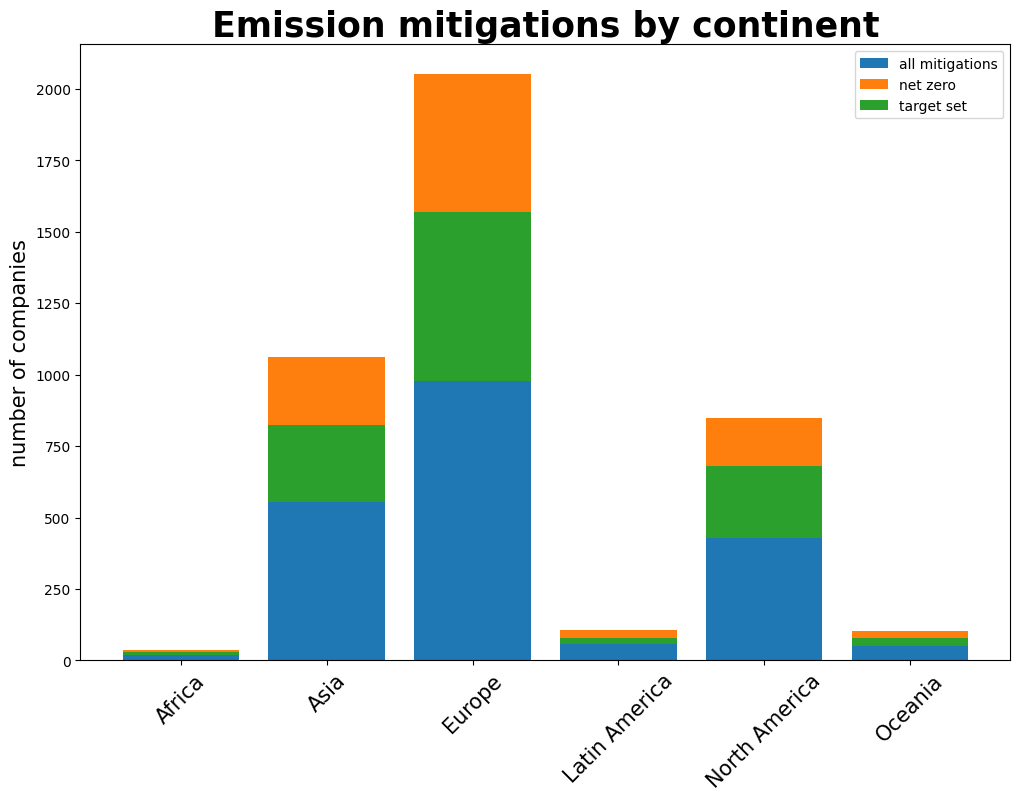

In [6]:
region = df.groupby(by = 'Region' )
region_net_zero = net_zero.groupby(by = 'Region' )
region_target_set = target_set.groupby(by = 'Region' )
region_name = (region.first().index)
company_numbers = np.array([ len(region.get_group(name)) for name in region_name])
company_numbers_net_zero = np.array([ len(region_net_zero.get_group(name)) for name in region_name])
company_numbers_target_set = np.array([ len(region_target_set.get_group(name)) for name in region_name])

plt.figure(figsize=(12,8))
plt.bar(region_name, company_numbers, label='all mitigations')
plt.bar(region_name, company_numbers_net_zero, 
        bottom = (company_numbers + company_numbers_target_set), label='net zero')
plt.bar(region_name, company_numbers_target_set, bottom = company_numbers, label='target set')
plt.ylabel('number of companies', fontsize = 15)
plt.title('Emission mitigations by continent' , fontweight = 'demibold' , fontsize = 25)
plt.xticks(rotation = 45, fontsize = 15)
plt.legend()
#plt.savefig(path.join(result_folder, 'engagements_par_continents_stacked.png'))
plt.show();

### Type of companies
**SBTi has a three classes classification :**
* Financial Insttution
* Small or medium entreprise
* Company

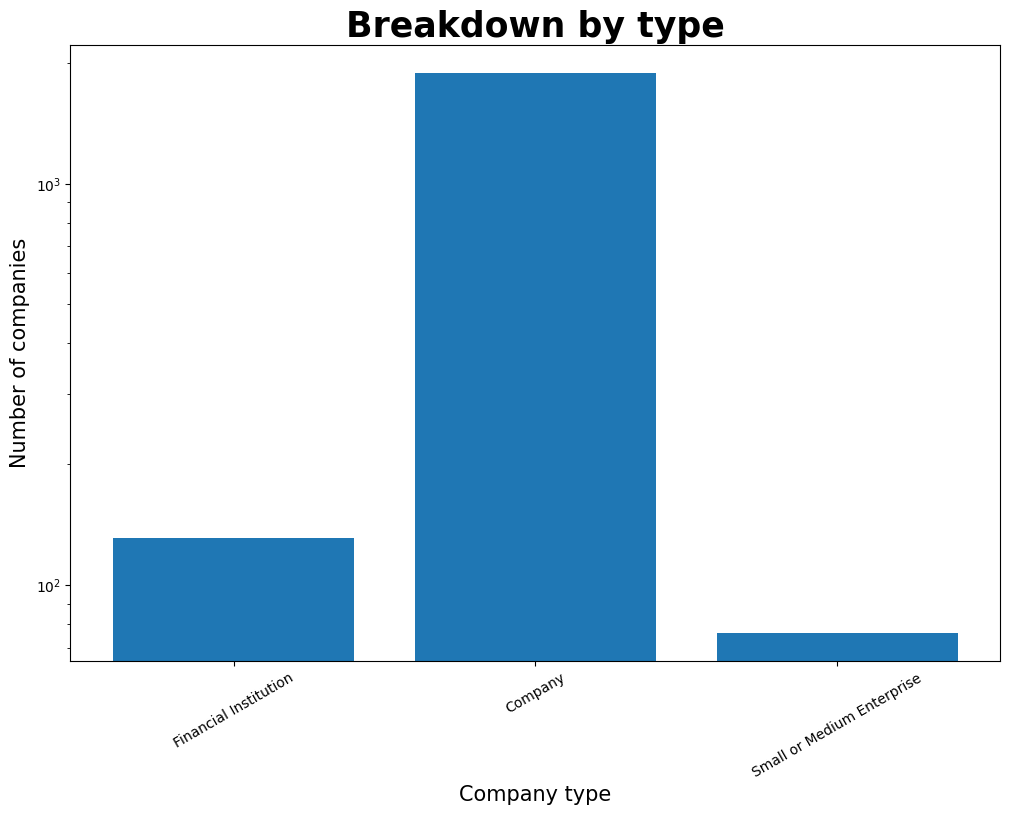

In [8]:
Organization_type = df['Organization Type'].unique()
type_number = [len(df[ df['Organization Type'] == m]) for m in Organization_type]

plt.figure(figsize=(12,8))
plt.bar( Organization_type, type_number )
plt.xticks( rotation = 30 )
plt.ylabel('Number of companies', fontsize = 15)
plt.yscale('log') # logarithmic scale for clearer chart
plt.xlabel('Company type', fontsize =15 )
plt.title('Breakdown by type', fontsize = 25, fontweight = 'semibold')
#plt.savefig(path.join(result_folder, 'repartition_par_type.png'))
plt.show();

### Sectors

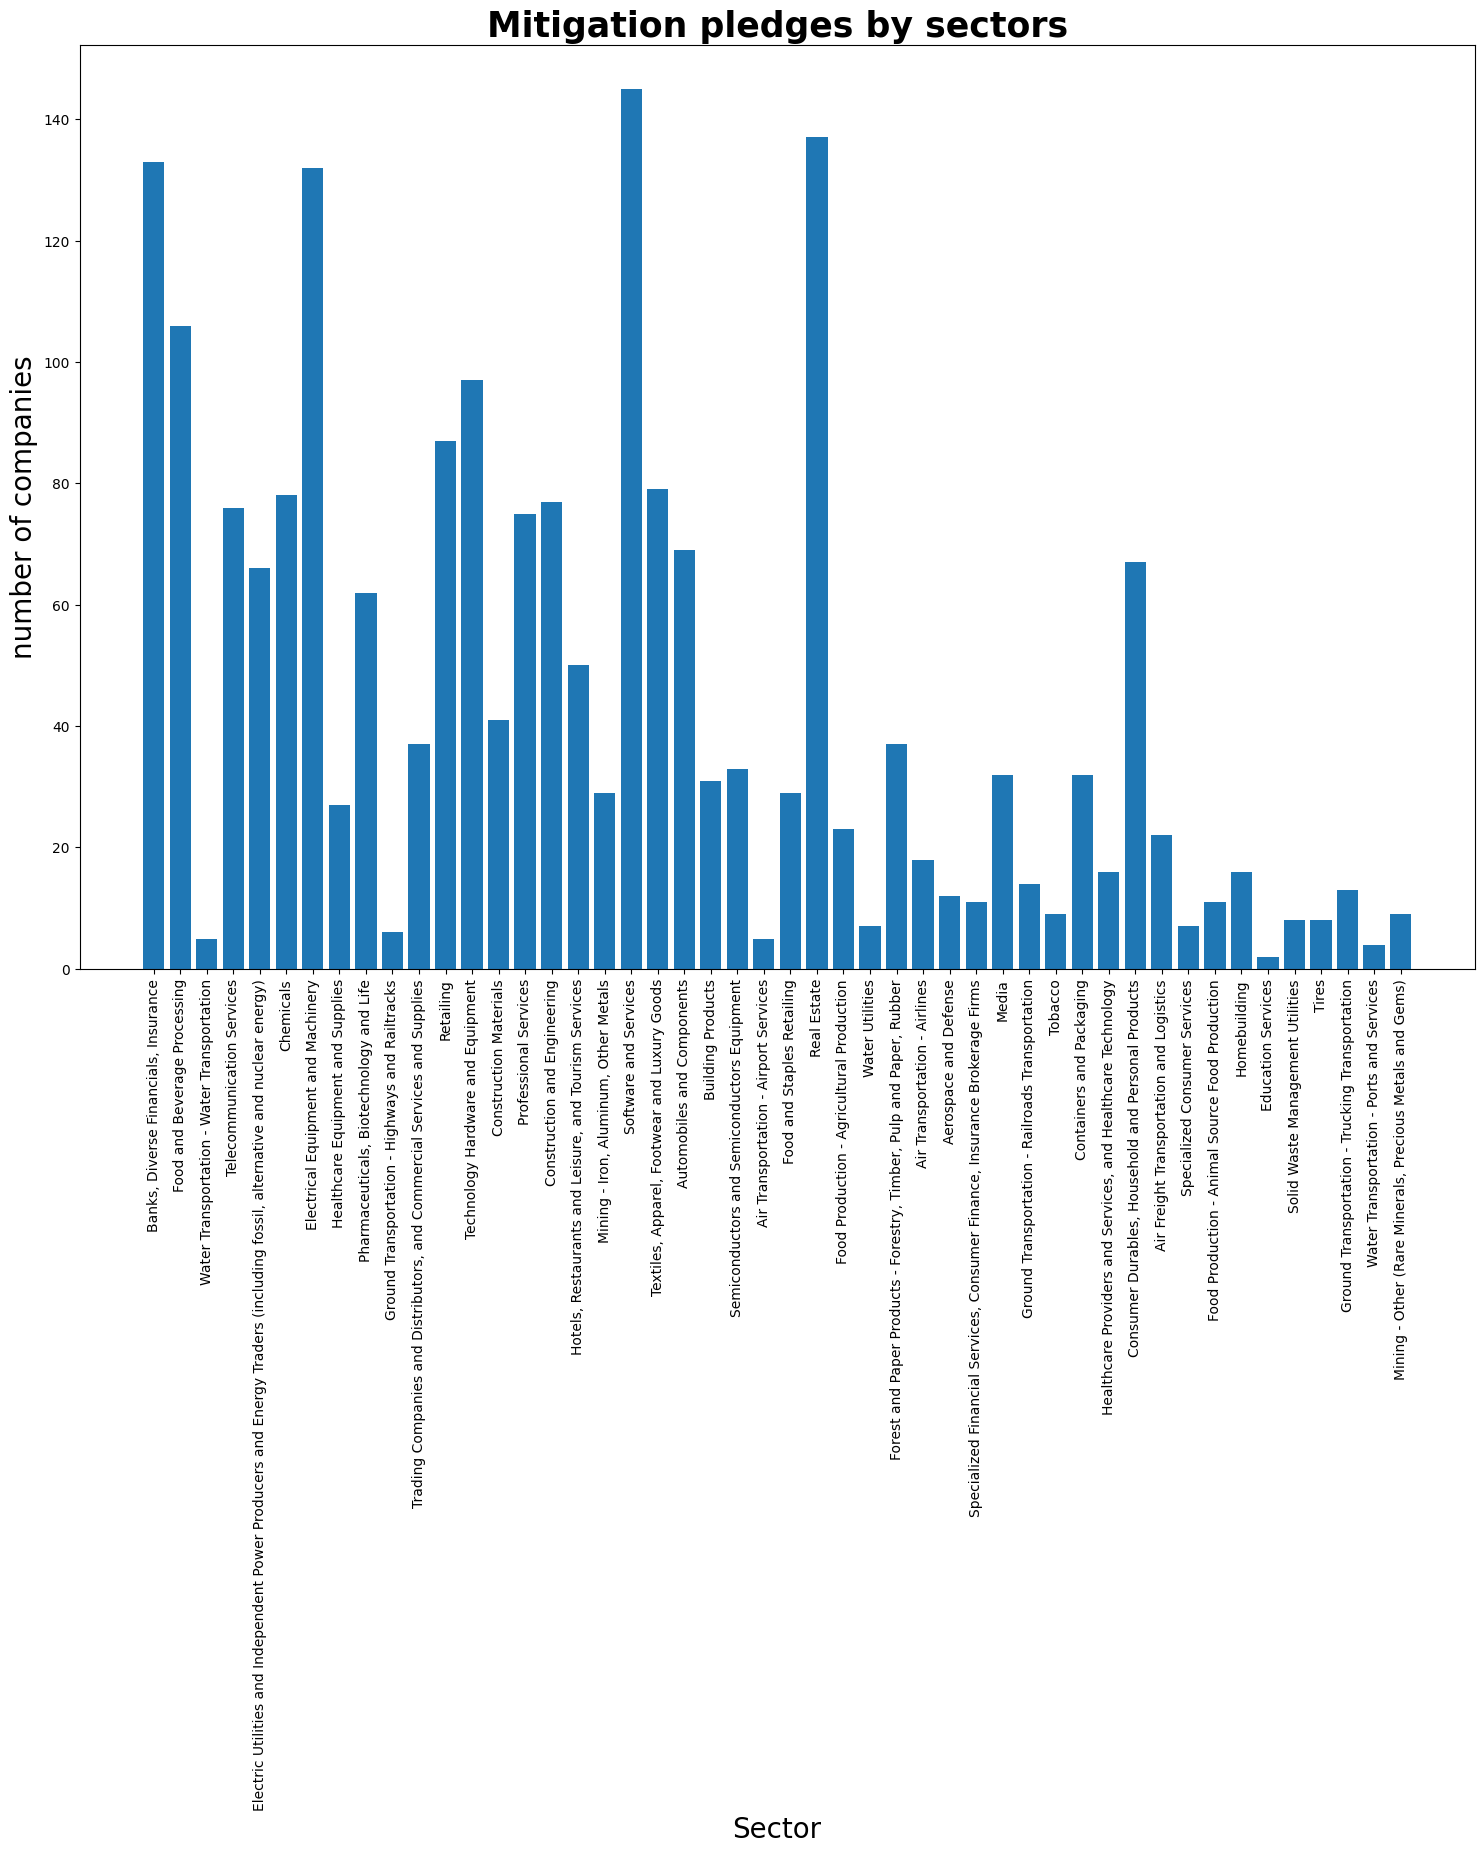

In [9]:
Sector = df['Sector'].unique()
Sector_number = [len(df[ df['Sector'] == m]) for m in Sector]

plt.figure(figsize=(18, 12))
plt.bar( Sector, Sector_number )
plt.xticks( rotation = 90 )
plt.ylabel('number of companies' , fontsize = 20)
plt.xlabel( 'Sector', fontsize = 20)
plt.title("Mitigation pledges by sectors" , fontsize = 25, fontweight = 'semibold')
#plt.savefig(path.join(result_folder, 'repartition_par_secteur.png'))
plt.show();

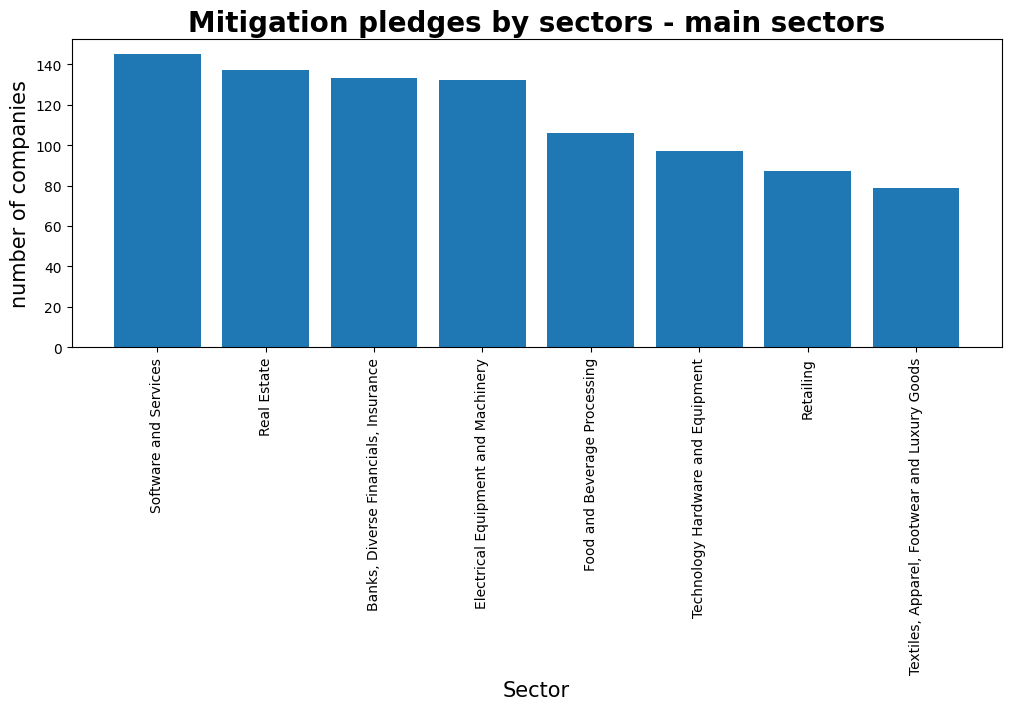

In [10]:
N_bigest = 8 # The N main sectors to consider
Sector = df['Sector'].unique()
Sector_number = np.array([len(df[ df['Sector'] == m]) for m in Sector])
ind = (np.argsort(Sector_number)[-N_bigest :])[::-1] #Les indides des N plus grands
Sector = Sector[ind]
Sector_number = Sector_number[ind]

plt.figure(figsize=(12, 4))
plt.bar( Sector, Sector_number )
plt.xticks( rotation = 90 , fontsize = 10 )
plt.ylabel('number of companies' , fontsize = 15)
plt.xlabel( 'Sector', fontsize = 15)
plt.title("Mitigation pledges by sectors - main sectors" , fontsize = 20, fontweight = 'semibold')
#plt.savefig(path.join(result_folder, 'pricipaux_secteurs.png'))
plt.show();

### Date

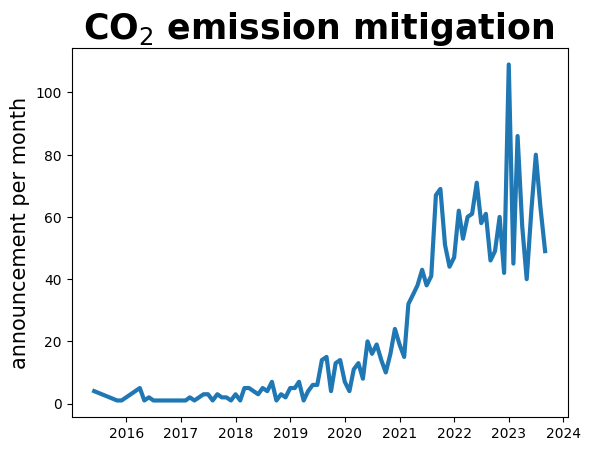

In [37]:
date = np.array((df[ 'Date']))
# keep only month and year
month_year = np.array([ d[3:] for d in date])
# new column in dataframe 
df2 = df.copy()
df2['month_year'] = month_year
groups = df2.groupby( by = 'month_year')
index = df2[ 'month_year' ].unique()
date_number  = [ len(groups.get_group( i )) for i in index]
result = [ (index[i], date_number[i]) for i in range(len(index))]

# key to sort by chronological order
def fun( tuple ):
    month = tuple[0][:3]
    year = tuple[0][ 4:]
    return year*12 + month

result.sort( key = fun)
index = np.array([ t[0] for t in result ])
date_number = np.array([ t[1] for t in result ])

# changing to a datetime object to plot more easily
def to_date(str):
     format = '%m/%Y'
     date = datetime.datetime.strptime(str, format)
     return date
to_date = np.vectorize(to_date)
index = to_date(index)

plt.plot(index, date_number, linewidth = 3)
plt.title("CO$_2$ emission mitigation " , fontsize = 25, fontweight = 'semibold')
plt.ylabel('announcement per month', fontsize = 15)
#plt.savefig(path.join(result_folder, 'annonce_par_mois.png'))
plt.show();

